Obtaining models as well as getting loss and optimiser functions


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
N=20
X=np.random.random(N)*10 -2 #generate numbers

Y=0.6*X+2+np.random.randn(N)

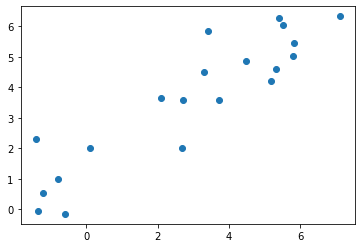

In [ ]:
plt.scatter(X,Y)

In [ ]:
#y=x*w+b , linear regression
model=torch.nn.Linear(1,1)

In [ ]:
#Loss function

loss_fn=torch.nn.MSELoss()
optimiser=torch.optim.SGD(model.parameters(),lr=0.05)

#Data is organised by [num_featues,num_dimension]

X=X.reshape(N,1)
Y=Y.reshape(N,1)



In [ ]:
inp=torch.from_numpy(X.astype(np.float32))
ex_out=torch.from_numpy(Y.astype(np.float32))

In [ ]:
#Training model

ep=20
losses=[]
for i in range(ep):
  optimiser.zero_grad()

  out=model(inp) #Forward pass

  loss=loss_fn(out,ex_out)#Finding loss
  print('loss : ',loss)
  losses.append(loss.item())

  loss.backward()#Finding gradients
  
  optimiser.step()

  print(i)

loss :  tensor(24.3044, grad_fn=<MseLossBackward>)
0
loss :  tensor(10.7439, grad_fn=<MseLossBackward>)
1
loss :  tensor(5.3140, grad_fn=<MseLossBackward>)
2
loss :  tensor(3.1092, grad_fn=<MseLossBackward>)
3
loss :  tensor(2.1865, grad_fn=<MseLossBackward>)
4
loss :  tensor(1.7759, grad_fn=<MseLossBackward>)
5
loss :  tensor(1.5722, grad_fn=<MseLossBackward>)
6
loss :  tensor(1.4542, grad_fn=<MseLossBackward>)
7
loss :  tensor(1.3735, grad_fn=<MseLossBackward>)
8
loss :  tensor(1.3107, grad_fn=<MseLossBackward>)
9
loss :  tensor(1.2577, grad_fn=<MseLossBackward>)
10
loss :  tensor(1.2112, grad_fn=<MseLossBackward>)
11
loss :  tensor(1.1696, grad_fn=<MseLossBackward>)
12
loss :  tensor(1.1320, grad_fn=<MseLossBackward>)
13
loss :  tensor(1.0979, grad_fn=<MseLossBackward>)
14
loss :  tensor(1.0669, grad_fn=<MseLossBackward>)
15
loss :  tensor(1.0388, grad_fn=<MseLossBackward>)
16
loss :  tensor(1.0132, grad_fn=<MseLossBackward>)
17
loss :  tensor(0.9899, grad_fn=<MseLossBackward>)
18
l

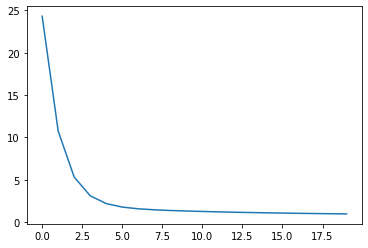

In [ ]:
plt.plot(losses)

NEURAL NETWORK FORMATION

In [4]:
import torch
import torchvision #Computer-vision and image databases
import numpy as np
import matplotlib.pyplot as plt


In [5]:
train_d=torchvision.datasets.MNIST(
    root='-',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=True
) #Get MNSIT dataset that comprises of handwritten numbers

test_d=torchvision.datasets.MNIST(
    root='-',
    train=False,
    transform=torchvision.transforms.ToTensor(),
    download=True
)
train_d.data.shape
test_d.data.shape

In [9]:
class NN(torch.nn.Module): #Define a neural network by making a class
  def __init__(self):
    super(NN,self).__init__()
    self.flatten=torch.nn.Flatten()#Flatten data
    self.hidden_layers=torch.nn.Sequential(
        torch.nn.Linear(28*28,512),    #Creates a layer of loads as 728 inputs and takes out 512 outputs
        torch.nn.ReLU(),               #After every iteration,make activation function
        torch.nn.Linear(512,512),
        torch.nn.ReLU(), 
        torch.nn.Linear(512,10),       #Creates a layer of loads as 512 inputs and 10 outputs
        torch.nn.ReLU()
    )

  def forward(self,x):
    x=self.flatten(x) #Flattening the dataset 
    out=self.hidden_layers(x)
    return out
model=NN() #Assigning the class to an object


In [10]:
torch.cuda.is_available() #Code to check if you have an optimal GPU
device=torch.device('cuda')

In [11]:
model.to(device) #Sending model to device
loss_fn=torch.nn.CrossEntropyLoss() #Loss function
optimiser=torch.optim.SGD(model.parameters(),lr=0.1) #Optimiser function

In [12]:
batch_s=16
train_loader=torch.utils.data.DataLoader(dataset=train_d,batch_size=batch_s,shuffle=True) #Make a loader based on the train dataset

test_loader=torch.utils.data.DataLoader(dataset=test_d,batch_size=batch_s,shuffle=True)   #Make a loader based on the test dataset

tmp_d=torch.utils.data.DataLoader(dataset=test_d,batch_size=1,shuffle=True)               #Make a loader based on the test dataset which has only one batch size

In [18]:
#Optimsing by printing out the losses
ep=10
for epoch in range(ep):
  for inp,out in train_loader:
    inputs,targets=inp.to(device),out.to(device)

  
    inputs=inputs.view(-1,784) #Reshape

    optimiser.zero_grad() #Zero grad

    outputs=model.forward(inputs) #Forward
    loss=loss_fn(outputs,targets )

    loss.backward() #Gradients
    optimiser.step()  #Update parameters
  print(epoch,loss.item()/16) #Print out the loss values of the neural networks

0 6.686443521175534e-05
1 7.421944246743806e-06
2 6.429547738662222e-06
3 8.458399861410726e-06
4 3.46443775924854e-05
5 9.332485205959529e-06
6 2.1144840047782054e-06
7 2.3748693678271593e-08
8 5.918006718275137e-05
9 4.6566015043936204e-08
